

I denne oppgaven har vi valgt å lage en annuitetslån kalkulator der man selv velger lånebeløp, renten og nedbetalingstid i år. Vi valgte dette temaet fordi det er relevant for studiet, og for privat bruk der de fleste søker om lån iløpet av livet. Det virket også spennende å se hvordan renter og avdrag påvirker hverandre termin for termin. Dette er også ett tema vi mest sannsynlig kommer til å møte senere i livet når vi skal kjøpe f.eks hus. 


For å bygge denne kalkulatoren har vi tatt inspirasjon fra {https://pbpython.com/amortization-model.html } `Chris2016`, dette er artikkelen til Chris Moffitt. Chris har drevet med programering i python i over 10 år. Han har også utdanning innen DataVitenskap. Han driver også bloggen "Practical Business Python", der vi har hentet inspirasjonen fra. 


Fremgangsmåten våres var å søke rundt på nettet etter lignende typer kode, som vi kunne ta inspirasjon fra. Vi brukte også kapitlene fra notebooks i jupiter til lage koden. Prosjektskissen vi leverte tidligere har vi brukt for å holde oss til oppgaven og det vi sa var målet våres, samt brukt mattematikk for å sjekket at outputen våres var korrekt. 

Analyse:

Det første vi gjør er å importere pakkene vi kommer til å trenge. Pandas har vi tenkt til å bruke for å lage tabellen i et dataframe. Matplotlib.pyplot bruker vi til plottingen av årlige renter i ett stolpediagram. Numpy_financial har noen innebygde funksjoner som hjelper oss med å regne ut terminbeløp, rentesatsen og hvor mye avdragene i hver termin er på. Datetime er brukt for å vise datoen og året på de forskjellige terminene. 

Etter pakkene er importert begyner vi å definere kravene til lånet som vi kommer til å trenge i kalkulatoren. Vi bruker print fuksjonen over de forskjellige variablene slik at du vet hva slags tall du skal taste inn i boksen. under print skriver vi først hva variabelen skal hete og så bruker vi input-fuksjonen. Denne fuksjonen gjør at vi kan taste inn tall selv. Lån og år setter vi som int fordi disse variablene sjeldenet er desimaltall. Renten er float fordi den ofte har ett desimal i lånesammenheng. Her har vi bestemt at det skal være 12 terminer i året. Renten deler vi på 100 for å få ett desimaltall, vi trenger at det er slik senere i utregningen.

Starter med å definere fuksjonen for kalkulator og hvilken variabel som kommer til å bli brukt her. Vi vil at det skal stå dato på hver innbetaling, så lager verdien periode som regner ut dette ut i fra antall terminer vi har totalt. Funksjonen date_range lager en tabell for betalingsdatoer, som starte nå og har år * termin_år perioder, freq='MS' sier at betalingsdatoen skal være i starten av hver måned. 

Definerer så selve DataFramet = df. Indeksen skal gå ut i fra periode som vi definerte over og kolonnene skal ha navnene som vist i koden. Vi vil at indeksen skal starte på 1 og ikke 0, dette er fordi at det da er lettere å holde oversikt over hvilken termin vi er i. Først reseter vi indeksen med reset_index(inplace=True), inplace=True gjør at den reseter det allerede eksisterende dataframet. Hadde vi ikke gjort dette vil den lagd ett nytt dataframe. Skriver så index += 1 for at den nye indeksen skal ha ett høyere tall en den originale. 

Så begyner vi å regne ut hva Terminbeløp, avdrag, rentebeløp, betalt lån, restlån, og betalt rente. Numpy_financial har innbygd funskjoner som regner ut terminbeløpe, renten og avdraget. Vi bruker disse og setter inn verdiene den trenger for å regne ut, vi tar et minustegn foran disse slik at det som kommer ut har positive verdier. Bruker df.round(2) for å avrunde desimalene til 2 desimaler. For å finne hvor mye vi har betalt i lån bruker vi .cumsum, den summerer avdragene etter hver periode. For å finne restlånet, tok vi det orginalet lånet - betalte lånet vi akkurat regnet ut. Summen av betalt rente regner vi ut på samme måte som betalt lån, nemlig med cumsum, brukt abs her for å absolutverdi. 

Vi trengte også å finne den siste betalingsdatoen. Til det bruker vi en try funksjon. Den leter etter at restlånet <= 0. Query-funksjonen her gjør dette uttrykke til en boolean, når uttrykket da ikke stemmer lenger slår except inn. Den bestemmer at dette er siste betalingen som blir kjørt. 

Tar så å bruker .concat for å rydde dataframet slik at det blir langt. Og verdier innenfor samme kategori blir stående i samme kolonne. Bruker så return fuksjonen på df og Betaling_sammendrag for å retunere fuksjonene vi har lagd.

Nå skal vi printe ut DataFramen vi har lagd. Skriver da tabell = kalkulatoren vi akkurat har lagd med verdiene du har bestemt. For i vise hele tabellen og ikke bare de første eller siste kolonne måtte vi skrive funksjonen pd.set_option('display.max_rows'). Når vi da displayer Tabellen vises alle kolonner og rader, og vi får en fullstendig nedbetalingsplan.

For å lage plotet henter vi info fra Tabellen våres. Bestemmer at vi skal ha år på x-aksen og årlig rentesum på y-aksen. Vi vil fremstille det som et stoplediagram, og setter på passende labels og title. 


Ønsket lånesum: 


 1500000


Renten på lånet i %: 


 2.5


Ønsker nedbetalingstid i år: 


 30


,Betalingsdato,Terminbeløp,Avdrag,Rente,Restlån,Betalt lån,Sum renter
1,2021-12-01,5926.81,2801.81,3125.00,1497198.19,2801.81,3125.00
2,2022-01-01,5926.81,2807.65,3119.16,1494390.54,5609.46,6244.16
3,2022-02-01,5926.81,2813.50,3113.31,1491577.04,8422.96,9357.47
4,2022-03-01,5926.81,2819.36,3107.45,1488757.68,11242.32,12464.92
5,2022-04-01,5926.81,2825.23,3101.58,1485932.45,14067.55,15566.50
6,2022-05-01,5926.81,2831.12,3095.69,1483101.33,16898.67,18662.19
7,2022-06-01,5926.81,2837.02,3089.79,1480264.31,19735.69,21751.98
8,2022-07-01,5926.81,2842.93,3083.88,1477421.38,22578.62,24835.86
9,2022-08-01,5926.81,2848.85,3077.96,1474572.53,25427.47,27913.82
10,2022-09-01,5926.81,2854.79,3072.03,1471717.74,28282.26,30985.85


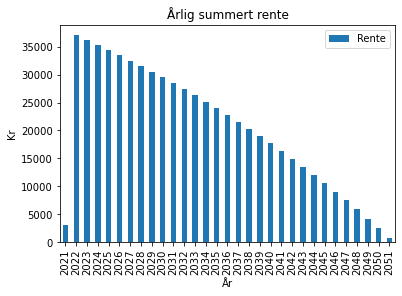

In [45]:
import pandas as pd
from datetime import date
import numpy_financial as npf
import matplotlib.pyplot as plt

# Definerer variabler vi kommer til å trenge senere i kalkulatoren.
print('Ønsket lånesum: ')
lån = int(input())    
print('Renten på lånet i %: ')
r = float(input())
print('Ønsker nedbetalingstid i år: ')
år = int(input())
termin_år = 12
rente = r/100

# Definerer kalkulatoren
def kalkulator (rente, år, termin_år, lån, start_dato=date.today()):
    # Lager en funksjon som printer ut lengden på lånet ut i fra anntall år og terminer
    periode = pd.date_range(start_dato, periods=år*termin_år, freq='MS') # MS står for måned start
    periode.name = 'Betalingsdato'

    # Lager dataframen som skal printe ut lånet etter terminer
    df = pd.DataFrame(index=periode, columns=['Terminbeløp', 'Avdrag', 'Rente', 'Restlån'], dtype='float')

    # Lager en index for terminene som starter på 1 og ikke 0
    df.reset_index(inplace=True)
    df.index += 1

    #Lager utregningene til selve kalkulatoren, numpy_financial har disse funksjonene innebygd
    terminbeløp = npf.pmt(rente/termin_år, år*termin_år, lån)
    df['Terminbeløp'] = -terminbeløp
    df['Avdrag'] = -npf.ppmt(rente/termin_år, df.index, år*termin_år, lån)
    df['Rente'] = -npf.ipmt(rente/termin_år, df.index, år*termin_år, lån)

    # For å avrunde tallene til bare 2 desimaler bruker vi funksjonen round.
    df = df.round(2)

    # Definerer hvor mye lån vi har betalt og passe på den ikke går over det orginale lånebeløpet
    df['Betalt lån'] = df['Avdrag'].cumsum()
    df['Betalt lån']  = df['Betalt lån'].clip(lower=-lån)

    # Definerer restlånet og summen av betalt rente
    df['Restlån'] = lån - df['Betalt lån']
    df['Sum renter'] = df['Rente'].abs().cumsum()

    # Definerer den siste betalingsdatoen
    try:
        siste_betaling = df.query('Restlån <= 0')['Restlån'].idxmax(axis=1, skipna=True) # axis=1 velger kolonne
    except ValueError:
        siste_betaling = df.last_valid_index()

    siste_betaling_dato = '{:%m-%d-%Y}'.format(df.loc[siste_betaling, 'Betalingsdato'])

    # Får betalingsinfoen inn i ett DataFrame
    betaling_info = (df[['Terminbeløp', 'Avdrag', 'Rente']])

    betaling_detaljer = pd.DataFrame.from_dict(dict([('nedbetaling', [siste_betaling_dato]),
                                                     ('Renten', [rente]),
                                                     ('Antall år', [år])
                                                     ]))

    # Lager en kolonne med hvor mye vi betaler hver måned
    betaling_detaljer['Terminer'] = round(terminbeløp, 2)

    Betaling_sammendrag = pd.concat([betaling_detaljer, betaling_info], axis=1)
    return df, Betaling_sammendrag

Tabell, ld = kalkulator(rente, år, termin_år, lån) # vi skriv ld for lånedetaljer
pd.set_option('display.max_rows', Tabell.shape[0]+1) # Bruker denne funksjonen for å vise hele dataframet

display(Tabell)

# Lager ett stolpediagram der vi summerer de årlige rentebetalingene og plotter det.
# Summerer årlig sum fordi det blir mere overskiktlig enn å ha hver termin.

fig, ax = plt.subplots(1, 1)

Tabell2 = Tabell.set_index('Betalingsdato').resample('A')['Rente'].sum().abs().reset_index()
Tabell2['År'] = Tabell2['Betalingsdato'].dt.year
Tabell2.plot(kind='bar', x='År', y='Rente', ax=ax, ylabel='Kr', title='Årlig summert rente');

Konklusjon:

Denne oppgaven syntes vi har vært veldig lærerik, da vi har brukt flere elementer fra pensum for å lage koden. Denne oppgaven om å lage en lånekalkulator var også en del vanskligere og tidkrevende enn det vi hadde sett for oss på forhånd. Det har også krevd mye research for å klare å sette alt sammen til en fungerende kalkulator. Med mere erfraing innenfor python kunne vi ha sett for oss å plote f.eks avdrag inn i samme tabell for å se hvordan disse to variablene utvikler seg over tid. Tror også dette kunne vært gjort på en litt rydigere og enklere måte. Alt i alt er vi fornøyd med resultate vi presenterer. 